Experimental Expected value of record highs: 9.3777
Theoretical result: 9.364770371976183


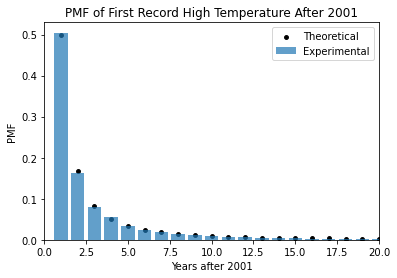

In [9]:
#Problem 1
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

#generate number of trials and years
trials = 10000
n=100
#list to store the number of record highs and lows for each trial 
lowest = []
highest = []
first_highest = []
#run the simulation for each trial
for i in range(trials):
    # generate temperature values from chosen normal distribution (can be different since it does not affect the answer)
    temps = sts.norm().rvs(n)
    #variables to store current highs and lows records and count them respectively
    highest_temp = float('-inf')
    maxes = 0
    lowest_temp = float('inf')
    mins = 0
    high_recorded = False
    #interate over temperatures for each year and classify as record high, record low, or nothing
    for t in range(len(temps)):
        if temps[t] > highest_temp:
            maxes += 1
            highest_temp = temps[t]
            
            #records the first record high for each trial (part 2 of the question)
            if t != 0 and high_recorded == False:
                high_recorded = True
                first_highest.append(t)
                
        if temps[t] < lowest_temp:
            mins += 1
            lowest_temp = temps[t]
            
    highest.append(maxes)
    lowest.append(mins)  
#print expected values and calculated result
print('Experimental Expected value of record highs:', np.mean(highest)+np.mean(lowest)-1)
print('Theoretical result:', 2*(np.log(n) + 0.577215)-1)
#plot the results
x = np.arange(1, 100, 1)
plt.bar(x, [first_highs.count(i)/trials for i in x], alpha=0.7, label='Experimental')
plt.scatter(x, [1/(n*(n+1)) for n in x], label='Theoretical', c='black', s=15)
plt.legend()
plt.title('PMF of First Record High Temperature After 2001')
plt.xlabel('Years after 2001')
plt.ylabel('PMF')
plt.xlim([0,20])
plt.show()

The parameter s is in the interval [0.768, 0.873] with probability 0.952


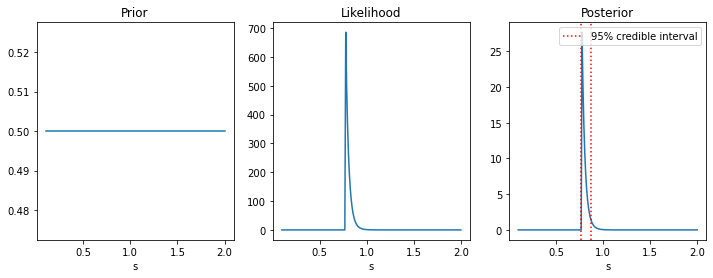

In [22]:
#Problem 2
x_values = [5.079, 4.341, 4.777, 4.717, 4.484, 4.995, 4.924, 4.530, 4.774, 4.658, 4.302, 4.341, 4.348]
y_values = [1.493, 1.657, 1.811, 1.28, 1.936, 1.444, 1.922, 1.72, 1.525, 2.049, 1.439, 1.971, 1.919]

lower_bound = 0.1 # calculated as using the star locations to create the smallest window possible
upper_bound = 2 # approximate estimate from the image
s_values = np.linspace(lower_bound, upper_bound, 200)
prior = sts.uniform(lower_bound, upper_bound).pdf(s_values) # P(s)

#measure the maximum distances between any 2 stars on x and y axis.
x_difference = max(x_values)-min(x_values)
y_difference = max(y_values)-min(y_values)
likelihood = []

#iterate over s values
for i in range(200):
#choose the liklihood : if the window is too small to fit all observed stars - o, otherwise as given by its formula
    if s_values[i] < x_difference  or s_values[i] < y_difference:
        likelihood.append(0)
    else:
        likelihood.append((1/s_values[i])**(2*len(x_values)))
# compute posterior using trapz integration
from scipy.integrate import trapz
product = prior * likelihood
marginal_likelihood = trapz(product, s_values)
posterior = product / marginal_likelihood

# plot prior 
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Prior')
plt.xlabel('s')
plt.plot(s_values, prior)
# plot likelihood
plt.subplot(1, 3, 2)
plt.title('Likelihood')
plt.xlabel('s')
plt.plot(s_values, likelihood)
# plot posterior
plt.subplot(1, 3, 3)
plt.title('Posterior')
plt.xlabel('s')
plt.plot(s_values, posterior)
# produce 95% credible interval
index = [70, 81]
interval = [s_values[index[0]], s_values[index[1]]]
interval_probability = trapz(posterior[index[0]:index[1]+1], s_values[index[0]:index[1]+1])
print(f'The parameter s is in the interval [{interval[0]:.3f}, {interval[1]:.3f}] 'f'with probability {interval_probability:.3f}')
plt.axvline(interval[0], color='red', linestyle=':', label='95% credible interval')
plt.axvline(interval[1], color='red', linestyle=':')
plt.legend()
plt.show()